## **DSCI 100 002 Group 4 Project Proposal**

## **Introduction** ## 

Heart disease is a leading cause of death worldwide, with millions of lives lost each year. The fight against this pervasive health issue increasingly leverages data analysis to identify risk factors, improve diagnostic methods, and tailor treatments more effectively. This project focuses on analyzing a heart disease dataset from the UCI Machine Learning Repository, which includes critical variables such as age, cholesterol levels, and blood pressure among others. 

"*In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is an integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).*" 

**By exploring this dataset, we aim to predict heart disease by age and cholesterol, contributing to better health outcomes.**


Source:\
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

## **Preliminary exploratory data analysis:** ##

**Load the Packages**

In [11]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

**Read the Data**

In [29]:
heart_data <- read_csv("processed.cleveland.csv", col_names = FALSE) |>
select(X1, X2, X3, X4, X5, X8, X14)

colnames(heart_data) <- make.names(c("age", "sex", "pain_location", "restbps", "cholesterol", "maxbpm", "diag_count"))
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,pain_location,restbps,cholesterol,maxbpm,diag_count
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,150,0
67,1,4,160,286,108,2
67,1,4,120,229,129,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,115,3
57,0,2,130,236,174,1
38,1,3,138,175,173,0


**Extracting the training data, and Summarize the data in table**

In [31]:
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = diag_count)
heart_data_training <- training(heart_data_split)
heart_data_testing <- testing(heart_data_split)

The number of patients by age factor

In [32]:
number_of_patients_by_age <- heart_data_training |>
group_by(age) |>
summarize(parient_count = n())
number_of_patients_by_age

age,parient_count
<dbl>,<int>
29,1
34,2
35,2
⋮,⋮
74,1
76,1
77,1


In [33]:
mean_cholesterol <- heart_data_training |>
group_by(diag_count) |>
summarize(mean_cholesterol = mean(cholesterol, na.rm = TRUE))

print(mean_cholesterol)

# A tibble: 5 × 2
  diag_count mean_cholesterol
       <dbl>            <dbl>
1          0             244.
2          1             254.
3          2             263.
4          3             247.
5          4             258.


**Visualize the data**

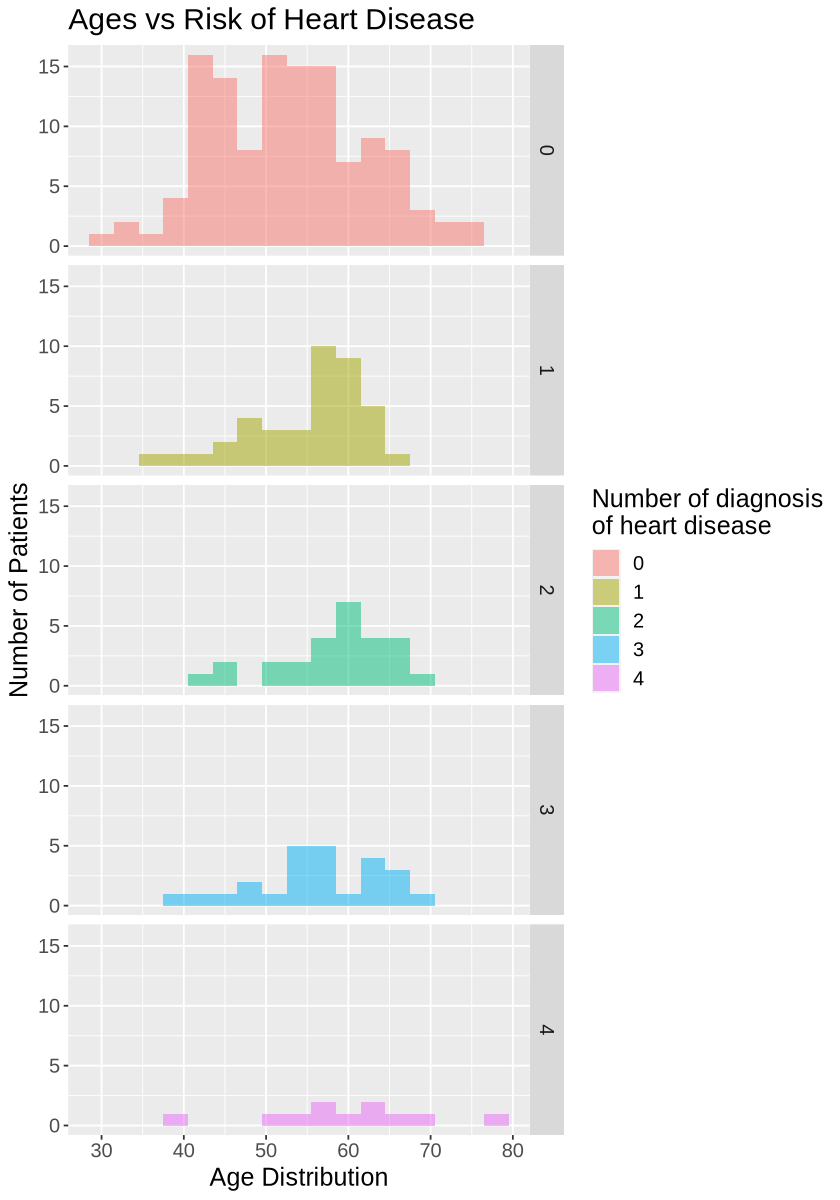

In [41]:
options(repr.plot.width = 7, repr.plot.height = 10)
plot_ages <- heart_data_training |>
ggplot(aes(x = age, fill = as_factor(diag_count))) +
geom_histogram(na.rm = TRUE, binwidth = 3, alpha = 0.5, position = "identity") +
labs(title = "Ages vs Risk of Heart Disease", x = "Age Distribution",y = "Number of Patients" , fill = "Number of diagnosis \nof heart disease") +
scale_fill_discrete(labels = c("0", "1", "2", "3", "4")) +
theme(text = element_text(size = 15))


plot_ages <- plot_ages + 
facet_grid(rows = vars(diag_count))

plot_ages

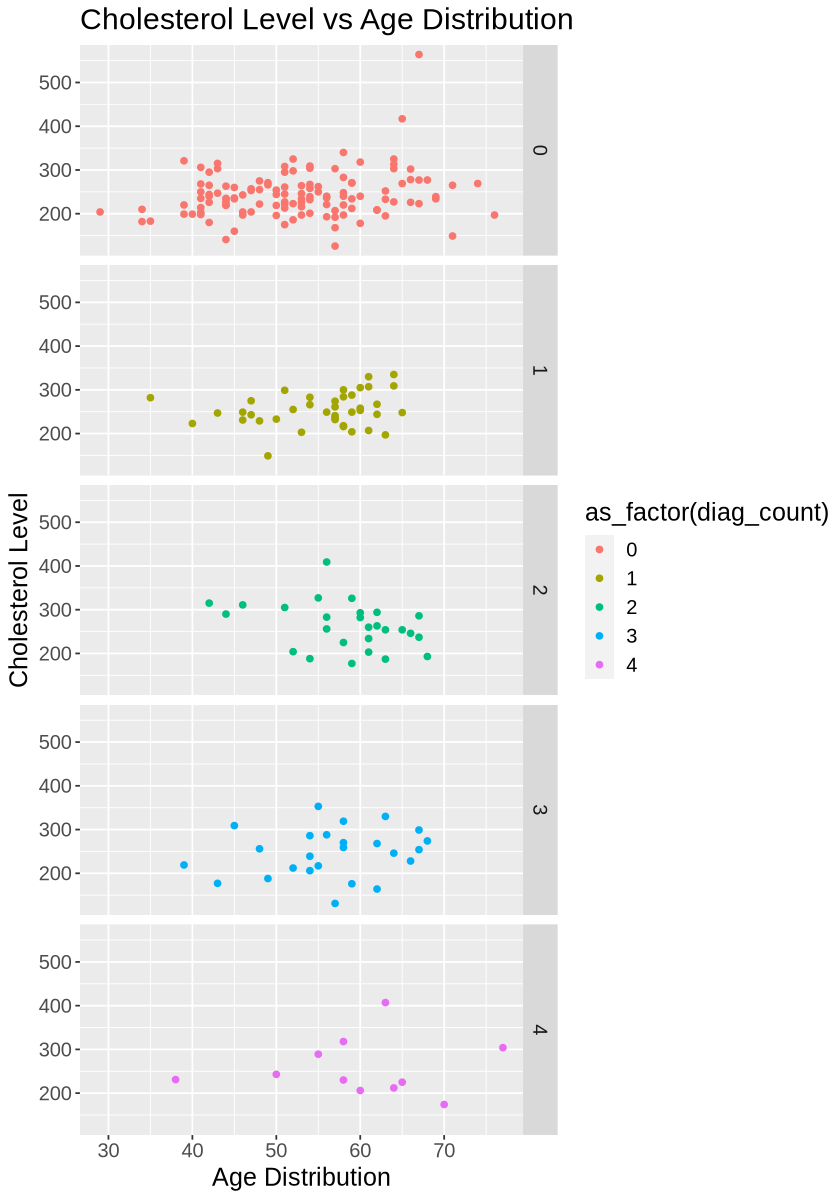

In [52]:
options(repr.plot.width = 7, repr.plot.height = 10)
scatter_cholesterol <- heart_data_training |>
ggplot(aes(x = age, y = cholesterol, color = as_factor(diag_count))) +
geom_point() +
labs(title = "Cholesterol Level vs Age Distribution", x = "Age Distribution", 
     y = "Cholesterol Level" , fill = "Number of diagnosis \nof heart disease") +
theme(text = element_text(size = 15))

scatter_cholesterols <- scatter_cholesterol + 
facet_grid(rows = vars(diag_count))

scatter_cholesterols

## **Methods:**

**Data Analysis Approach**

We plan to anaylze teh data through the creation of histogram and scatter plots for each variable, focusing on "age," "cholesterol level," and "diag_count." Using K-nearest neighbor classfication and regression, we aim to predict the risk of heart disease in new patients.

**Variable Selection:**

Out primary focus will be on **the variables "age," "cholesterol," and "diag_count."** However, we may delve deeper into age brackets, considering **"sex"** as a factor in our subsequent report to identify individuals at a higher risk of the disease.

**Data Visualization:**

For K-nearest neighbor classficiation, we will generate scatter plots illustrating relationships between variables. An example would be a scatter plot with the correlation between high cholesterol levels and age, colored by the presence of heart disease (health). Additionally, we intend to visually represent the distribution of patients by age and sex to gain further insight.
 

## **Expected outcomes and significance:**

**What do you expect to find?** 

We are expecting to find the relationship between the factors, such as a higher cholesterol level or aging resulting in a higher risk of heart disease. We are also expecting how much higher blood pressure, or sex affect to the risk of heart disease; breif data usually claims women more likely hava higher risk of heart disease than men.  

**What impact could such findings have?**

Understanding the demographics most at risk can indeed provide valuable insights applicable to a broader population, potentially millions if not billions around the world. This medical research on heart diseases could help us narrow down the key factors which are responsible and develop the necessary technology, and techniques to detect this disease well in advance which may save lives of those at risk.

**What future questions could this lead to?**

This result may prompt future investigations into potential preventative treatments for heart disease, focusing on strategies to lower cholesterol levels, reduce resting blood pressure, and address related factors.